## Install Package

In [51]:
# !pip install Sastrawi 
# !pip install tweet-preprocessor
# !pip install textblob
# !pip install wordcloud
# !pip install nltk
# !pip install translate

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import Sastrawi 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Cleaning

In [53]:
data = pd.read_csv('data_capres/prabowo.csv')
data.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:10:46 +0000 2023,1735512698522382615,"@andre_rosiade eh botak, bilang ke capres lu d...",0,0,0,0,in,1718575798792355840,1735204525517177333,Yhafidzun15,https://twitter.com/Yhafidzun15/status/1735512...
1,1,Fri Dec 15 04:10:46 +0000 2023,1735512698086166538,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",0,0,0,0,in,1101762919,1735512698086166538,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126980...
2,2,Fri Dec 15 04:10:43 +0000 2023,1735512687281573985,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",0,0,0,0,in,1101762919,1735512687281573985,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126872...
3,3,Fri Dec 15 04:10:41 +0000 2023,1735512676552597739,@kurawa jokowi hebat....setuju tapi melihat pe...,0,0,0,0,in,1069905602,1735205387757146512,romobing,https://twitter.com/romobing/status/1735512676...
4,4,Fri Dec 15 04:10:38 +0000 2023,1735512663923490883,Prabowo prediksi AHY akan jadi pemimpin di tin...,0,0,0,0,in,1101762919,1735512663923490883,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126639...


In [54]:
data.shape

(503, 13)

In [55]:
data = data[['full_text', 'username', 'created_at']]
data

,full_text,username,created_at
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,"@kompascom Memang tidak mudah, sekarang masyar...",HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,Visi Prabowo - Gibran membawa harapan baru bag...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,@supersaiyaindo @ch_chotimah2 Pembenaran akan ...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,Prabowo Gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


In [56]:
data = data.drop_duplicates(subset=['full_text'])
data = data.dropna()

In [57]:
print("info data null: ")
print(data.isnull().sum(), "\n")

print("info data duplicate")
print(data.duplicated().sum())

info data null: 
full_text     0
username      0
created_at    0
dtype: int64 

info data duplicate
0


In [58]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

data['full_text'] = data['full_text'].apply(clean_text)

In [59]:
data['full_text'] = data['full_text'].str.lower()

In [60]:
data['full_text'].head()

0    eh botak bilang ke capres lu dulu dia ngobrol ...
1    elektabilitas tembus 45 persen ahy prabowo bis...
2    beri pujian ke ahy prabowo pemimpin yang hebat...
3    jokowi hebatsetuju tapi melihat penampilan pra...
4    prabowo prediksi ahy akan jadi pemimpin di tin...
Name: full_text, dtype: object

In [61]:
data.shape

(502, 3)

In [62]:
# Normalisasi
norm = {" yg ": " yang ", " ganjar ":" ", " anies ": " ", "anis ": " ", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['full_text'] = data['full_text'].apply(lambda x: normalisasi(x))
data

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy prabowo bis...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ke ahy prabowo pemimpin yang hebat...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan pra...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,memang tidak mudah sekarang masyarakat mau tau...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,visi prabowo gibran membawa harapan baru bagi ...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,pembenaran akan selalu adatapi jika anda mau m...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,prabowo gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


## Data Preprocessing

1. **Stopwords**
   - **Pengertian**: Kata-kata umum yang sering muncul dalam teks tetapi tidak memiliki makna signifikan untuk analisis. 
   Contoh dalam bahasa Indonesia: *yang*, *di*, *ke*, *dan*, dll.
   - **Tujuan**: Menghapus kata-kata yang tidak penting dalam teks sehingga hanya kata-kata yang bermakna signifikan yang dianalisis lebih lanjut.

2. **Tokenize**
   - **Pengertian**: Proses memecah teks menjadi unit-unit yang lebih kecil yang disebut *token*. Setiap *token* biasanya merupakan kata individu, namun bisa juga berupa frasa atau kalimat.
   - **Tujuan**: Memisahkan teks menjadi kata atau unit yang lebih kecil agar bisa diproses lebih lanjut dalam model NLP.

3. **Stemming**
   - **Pengertian**: Proses mengubah kata ke bentuk dasarnya (*stem/root*) dengan menghapus awalan, akhiran, atau infleksi kata.
   - **Tujuan**: Mengurangi bentuk kata yang berbeda ke bentuk dasar yang sama untuk menyederhanakan analisis teks.

In [63]:
# Stopwords
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data['full_text'] = data['full_text'].apply(lambda x: stopword(x))
data

,full_text,username,created_at
0,eh botak bilang capres lu dulu ngobrol ama bah...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy prabowo men...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ahy prabowo pemimpin hebat bangsa ...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju melihat penampilan prabowo ...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy jadi pemimpin tingkat nas...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,memang mudah sekarang masyarakat mau tau apa g...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,visi prabowo gibran membawa harapan baru indon...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,pembenaran selalu adatapi mau merunut kata gib...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,prabowo gibran berkomitmen mengoptimalkan pote...,clara144495,Fri Dec 15 03:56:00 +0000 2023


In [64]:
# Tokenize
tokenized = data['full_text'].apply(lambda x:x.split())
tokenized

0      [eh, botak, bilang, capres, lu, dulu, ngobrol,...
1      [elektabilitas, tembus, 45, persen, ahy, prabo...
2      [beri, pujian, ahy, prabowo, pemimpin, hebat, ...
3      [jokowi, hebatsetuju, melihat, penampilan, pra...
4      [prabowo, prediksi, ahy, jadi, pemimpin, tingk...
                             ...                        
498    [memang, mudah, sekarang, masyarakat, mau, tau...
499    [visi, prabowo, gibran, membawa, harapan, baru...
500    [pembenaran, selalu, adatapi, mau, merunut, ka...
501    [prabowo, gibran, berkomitmen, mengoptimalkan,...
502    [programprogram, prabowogibran, jembatan, menu...
Name: full_text, Length: 502, dtype: object

In [65]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("D:\Final_Project\Sentiment_Analysis\data_preprocessing/HasilPreprocessing_Prabowo.csv", index=False)

eh botak bilang capres lu dulu ngobrol ama bahas komitmen untuk nuntasin dibjakarta lama ngejabat gamau nyalonin bentuk apa pilpres 2019 karenaaa udh komitmen ama pak prabowo mau fokus jakartaaa dulu jadi gubernur gemes gw
elektabilitas tembus 45 persen ahy prabowo menang satu putar mua agusyudhoyono pdemokrat demokrat bareng ahy
beri puji ahy prabowo pimpin hebat bangsa indonesia muj pdemokrat agusyudhoyono demokrat bareng ahy
jokowi hebatsetuju lihat tampil prabowo debat 1 beliau salah pilih orang
prabowo prediksi ahy jadi pimpin tingkat nasional fc agusyudhoyono pdemokrat demokrat bareng ahy
acara hari seru banget prabowo sby djoko suyanto sutanto alumni akabri 19701973 hadir semua dekade08
warga indonesia butuh sosok pimpin seperti mas gibran ada
demokrat sumsel siap menang pasang prabowogibran pilpres 2024 vh pdemokrat agusyudhoyono demokrat bareng ahy
emang parah jijik sih bunuh karakter leceh personal prabowo debat kemaren pak gp aja mo nanya masalah ham pakai kata halus minta m

## Translate

In [67]:
data_prep = pd.read_csv("D:\Final_Project\Sentiment_Analysis\data_preprocessing\HasilPreprocessing_Prabowo.csv", encoding='latin1')
data_prep.head()

,full_text
0,eh botak bilang capres lu dulu ngobrol ama bah...
1,elektabilitas tembus 45 persen ahy prabowo men...
2,beri puji ahy prabowo pimpin hebat bangsa indo...
3,jokowi hebatsetuju lihat tampil prabowo debat ...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...


In [72]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data_prep['tweet_english'] = data_prep["full_text"].apply(convert_eng)
data_prep.to_csv("D:\Final_Project\Sentiment_Analysis\data_translate/TerjemahanPrabowo.csv", index=False)

In [3]:
data_trans = pd.read_csv("D:\Final_Project\Sentiment_Analysis\data_translate\TerjemahanPrabowo.csv")
data_trans.head()

,full_text,tweet_english
0,eh botak bilang capres lu dulu ngobrol ama bah...,uh bald said your presidential candidate used ...
1,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...
2,beri puji ahy prabowo pimpin hebat bangsa indo...,give praise ahy prabowo great leader of the In...
3,jokowi hebatsetuju lihat tampil prabowo debat ...,jokowi hebats agreed see appear prabowo debate...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...


## Labeling

In [4]:
data_tweet = list(data_trans['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 254
Netral = 170
Negatif = 78

Total Data : 502


In [5]:
sentimen_data = pd.DataFrame({
    'Sentimen': ['Positif', 'Negatif', 'Netral'],
    'Jumlah': [total_positif, total_negatif, total_netral]
})

sentimen_data

,Sentimen,Jumlah
0,Positif,254
1,Negatif,78
2,Netral,170


In [6]:
data_trans['klasifikasi'] = status
data_trans

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama bah...,uh bald said your presidential candidate used ...,Negatif
1,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,Positif
2,beri puji ahy prabowo pimpin hebat bangsa indo...,give praise ahy prabowo great leader of the In...,Positif
3,jokowi hebatsetuju lihat tampil prabowo debat ...,jokowi hebats agreed see appear prabowo debate...,Negatif
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...,Netral
...,...,...,...
497,memang mudah sekarang masyarakat mau tau apa g...,it is easy now people want to know what is the...,Positif
498,visi prabowo gibran bawa harap baru indonesia ...,vision prabowo gibran bring hope new indonesia...,Positif
499,benar selalu adatapi mau runut kata gibran kat...,true always customapi want to track the word g...,Positif
500,prabowo gibran komitmen optimal potensi indust...,prabowo gibran optimal commitment to domestic ...,Netral


## Visualisasi

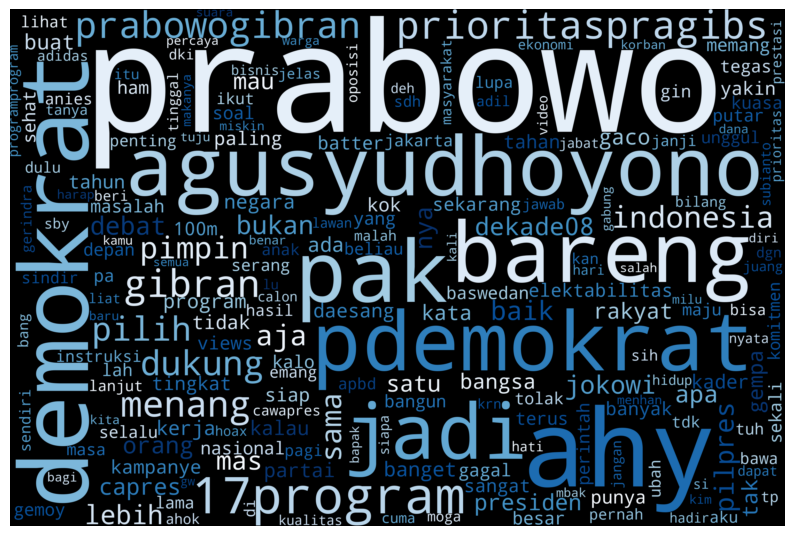

In [7]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data_trans['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

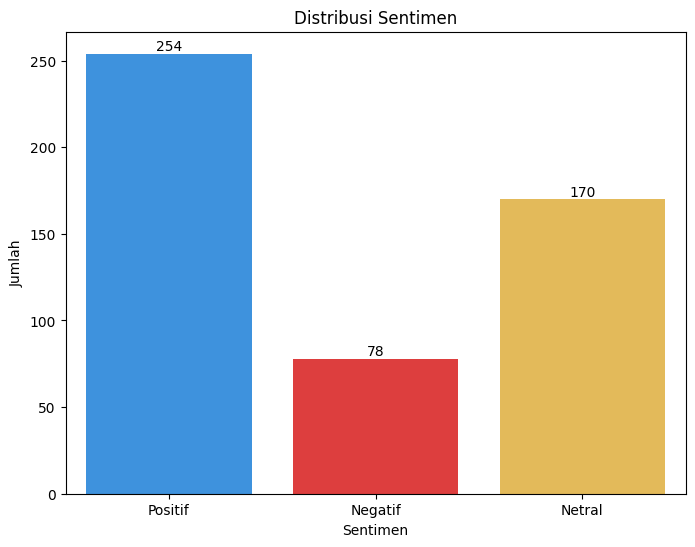

In [8]:
colors = ['#2394f7', '#f72323', '#fac343']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sentimen', y='Jumlah', data=sentimen_data, palette=colors)

for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

plt.show()

## Evaluation

In [9]:
dataset = data_trans.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [10]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [11]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.798804780876494


In [12]:
data_tweet = list(data_trans['tweet_english'])

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 280
Netral = 193
Negatif = 29

Total Data : 502


In [13]:
sentimen_data_NB = pd.DataFrame({
    'Sentimen': ['Positif', 'Negatif', 'Netral'],
    'Jumlah': [total_positif, total_negatif, total_netral]
})

sentimen_data_NB

,Sentimen,Jumlah
0,Positif,280
1,Negatif,29
2,Netral,193


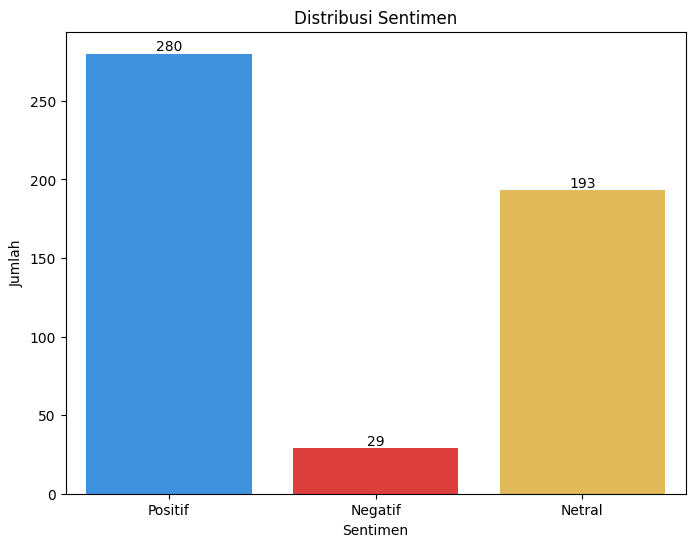

In [14]:
colors = ['#2394f7', '#f72323', '#fac343']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sentimen', y='Jumlah', data=sentimen_data_NB, palette=colors)

for i in ax.containers:
    ax.bar_label(i)

plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

plt.show()

In [15]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data_trans['Klasifikasi_Bayes'] = status

data_trans

,full_text,tweet_english,klasifikasi,Klasifikasi_Bayes
0,eh botak bilang capres lu dulu ngobrol ama bah...,uh bald said your presidential candidate used ...,Negatif,Netral
1,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,Positif,Positif
2,beri puji ahy prabowo pimpin hebat bangsa indo...,give praise ahy prabowo great leader of the In...,Positif,Netral
3,jokowi hebatsetuju lihat tampil prabowo debat ...,jokowi hebats agreed see appear prabowo debate...,Negatif,Netral
4,prabowo prediksi ahy jadi pimpin tingkat nasio...,prabowo predicts ahy to be the national level ...,Netral,Netral
...,...,...,...,...
497,memang mudah sekarang masyarakat mau tau apa g...,it is easy now people want to know what is the...,Positif,Positif
498,visi prabowo gibran bawa harap baru indonesia ...,vision prabowo gibran bring hope new indonesia...,Positif,Positif
499,benar selalu adatapi mau runut kata gibran kat...,true always customapi want to track the word g...,Positif,Positif
500,prabowo gibran komitmen optimal potensi indust...,prabowo gibran optimal commitment to domestic ...,Netral,Netral


In [19]:
data_eval = [tuple(x) for x in data_trans.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]} \n')
        else:
            print("Tuple tidak memiliki cukup elemen.")

Text: eh botak bilang capres lu dulu ngobrol ama bahas komitmen untuk nuntasin dibjakarta lama ngejabat gamau nyalonin bentuk apa pilpres 2019 karenaaa udh komitmen ama pak prabowo mau fokus jakartaaa dulu jadi gubernur gemes gw
Classifier: Negatif
Classifier Bayes: Netral 

Tuple tidak memiliki cukup elemen.
Text: beri puji ahy prabowo pimpin hebat bangsa indonesia muj pdemokrat agusyudhoyono demokrat bareng ahy
Classifier: Positif
Classifier Bayes: Netral 

Text: jokowi hebatsetuju lihat tampil prabowo debat 1 beliau salah pilih orang
Classifier: Negatif
Classifier Bayes: Netral 

Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Tuple tidak memiliki cukup elemen.
Text: prabowo subianto dapat banyak dukung artis maupun kont